<a href="https://colab.research.google.com/github/IT24102088/Plant-Disease-Detection-System-final-PG-NO-147/blob/main/aimlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import clear_output
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = 'supuntheekshanam'
os.environ['KAGGLE_KEY'] = '97fb6c99381c9d6779d3f904ef279dce'
clear_output()

In [3]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset" -p /content/drive/MyDrive/datasets/

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.66G/2.70G [00:17<00:00, 127MB/s]
100% 2.70G/2.70G [00:17<00:00, 168MB/s]


In [4]:
!unzip /content/drive/MyDrive/datasets/new-plant-diseases-dataset.zip
clear_output()

In [5]:
import tensorflow as tf
import os
data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

class_names = [d for d in os.listdir(data_dir)
               if os.path.isdir(os.path.join(data_dir, d)) and 'healthy' not in d.lower()]

training_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

print(class_names)

Found 48001 files belonging to 26 classes.
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Common_rust_', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Apple___Apple_scab', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Apple___Cedar_apple_rust', 'Peach___Bacterial_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)']


In [6]:
data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

class_names = [d for d in os.listdir(data_dir)
               if os.path.isdir(os.path.join(data_dir, d)) and 'healthy' not in d.lower()]

validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

Found 12000 files belonging to 26 classes.


In [7]:
print("Classes used for training:")
print(class_names)

Classes used for training:
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Common_rust_', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Apple___Apple_scab', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Apple___Cedar_apple_rust', 'Peach___Bacterial_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)']


In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
training_set = training_set.map(lambda x, y: (Rescaling(1./255)(x), y))
validation_set = validation_set.map(lambda x, y: (Rescaling(1./255)(x), y))

In [9]:
from tensorflow.keras import layers
geometric_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

def apply_geometric_augmentation(image, label):
    image = geometric_augmentation(image)
    return image, label

training_set = training_set.map(apply_geometric_augmentation)

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from keras.optimizers import AdamW, SGD

In [11]:
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(256, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

In [12]:
model.compile(
    optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 54, 54, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 54, 54, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             

 Total params: 20,064,314 (76.54 MB)

 Trainable params: 20,062,394 (76.53 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [66]:
import sys
from io import StringIO

stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)

with open("/content/drive/MyDrive/images/model_summary.txt", "w") as f:
    f.write(short_model_summary)

print("Model summary saved to /content/drive/MyDrive/models/model_summary.txt")

Model summary saved to /content/drive/MyDrive/models/model_summary.txt


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

In [16]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 1014s 658ms/step - accuracy: 0.4470 - loss: 2.0405 - val_accuracy: 0.4666 - val_loss: 2.8861 - learning_rate: 1.0000e-04
Epoch 2/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 973s 648ms/step - accuracy: 0.7278 - loss: 0.9241 - val_accuracy: 0.7326 - val_loss: 0.9633 - learning_rate: 1.0000e-04
Epoch 3/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 967s 644ms/step - accuracy: 0.7984 - loss: 0.6830 - val_accuracy: 0.6341 - val_loss: 2.1904 - learning_rate: 1.0000e-04
Epoch 4/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 976s 650ms/step - accuracy: 0.8359 - loss: 0.5565 - val_accuracy: 0.7700 - val_loss: 1.0156 - learning_rate: 1.0000e-04
Epoch 5/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 949s 632ms/step - accuracy: 0.8659 - loss: 0.4525 - val_accuracy: 0.7712 - val_loss: 1.0982 - learning_rate: 1.0000e-04
Epoch 6/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 977s 651ms/step - accuracy: 0.9121 - loss: 0.2872 - val_accuracy: 0.8938 - val_loss: 0.3704 - learning_rate: 2.0000e-05
Epoch 7/10
1501/1501 ━━━━━━

In [17]:
train_loss,train_acc = model.evaluate(training_set)

1501/1501 ━━━━━━━━━━━━━━━━━━━━ 863s 575ms/step - accuracy: 0.9669 - loss: 0.1037


In [18]:
val_loss,val_acc = model.evaluate(validation_set)

375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8966 - loss: 0.3584


In [19]:
model.save("/content/drive/MyDrive/models/model26new.keras")

In [20]:
model = tf.keras.models.load_model("/content/drive/MyDrive/models/model26new.keras")

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/test/test/TomatoEarlyBlight5.JPG'

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)


img_array = np.expand_dims(img_array, axis=0)

preprocessed_image = img_array / 255.0

In [30]:
prediction = model.predict(preprocessed_image)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


(array([[3.2316454e-15, 3.2465485e-14, 8.3439581e-17, 1.5536955e-11,
         2.7282409e-11, 4.8144182e-07, 9.8095976e-09, 1.5401021e-12,
         5.1852970e-07, 1.7838966e-09, 2.1125506e-09, 2.4219409e-16,
         9.9999487e-01, 3.2569387e-13, 7.2798304e-12, 9.1892002e-07,
         7.5234335e-16, 4.9830830e-12, 3.0775587e-15, 3.3530100e-19,
         2.3768405e-09, 3.1331106e-06, 1.3836016e-16, 1.3723345e-12,
         1.8851376e-16, 3.0209461e-12]], dtype=float32),
 (1, 26))

In [31]:
result_index = np.argmax(prediction)
result_index

np.int64(12)

In [32]:
class_names[result_index]

'Tomato___Early_blight'

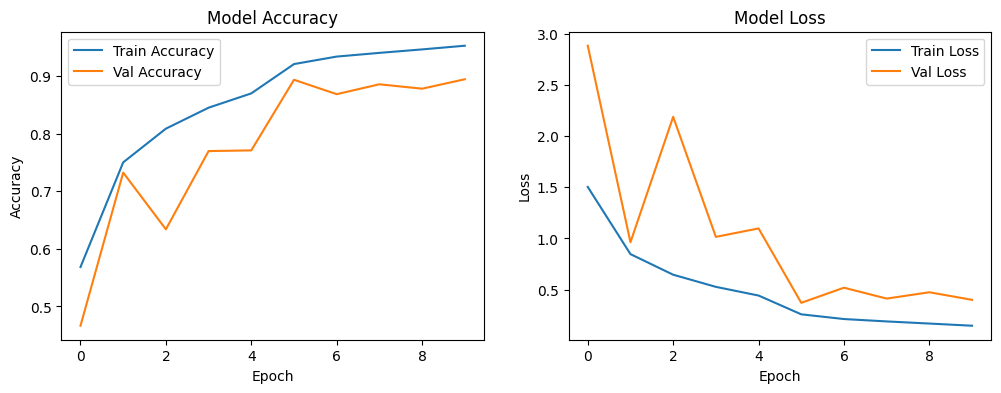

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/images/performance_curves.png", dpi=300, bbox_inches='tight')
plt.show()

In [41]:
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

Training Accuracy: 0.9678
Validation Accuracy: 0.8938
Training Loss: 0.1021
Validation Loss: 0.3704


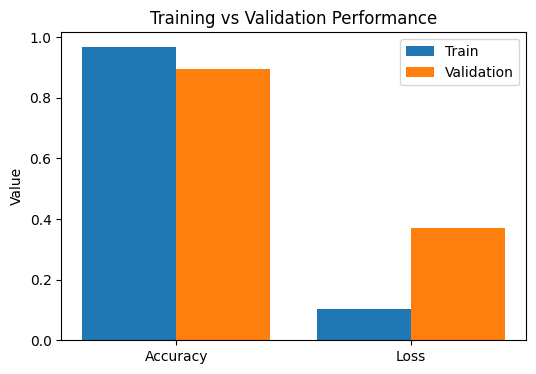

In [42]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Loss']
train_metrics = [train_acc, train_loss]
val_metrics = [val_acc, val_loss]

x = range(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x, train_metrics, width=0.4, label='Train', align='center')
plt.bar([i+0.4 for i in x], val_metrics, width=0.4, label='Validation', align='center')

plt.xticks([i+0.2 for i in x], labels)
plt.title('Training vs Validation Performance')
plt.ylabel('Value')
plt.legend()
plt.savefig("/content/drive/MyDrive/images/train_vs_val_performance.png", dpi=300, bbox_inches='tight')
plt.show()

In [43]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [44]:
IMG_SIZE = (224, 224)  # same size used during training

def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    img_array = img_array / 255.0  # normalize (if you did this in training)
    return img_array

In [46]:
data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

class_names = [d for d in os.listdir(data_dir)
               if os.path.isdir(os.path.join(data_dir, d)) and 'healthy' not in d.lower()]

test_folder = "/content/test/test/"
for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)

    img_array = load_and_preprocess(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    print(f"{img_name}: {predicted_class} ({confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
TomatoYellowCurlVirus6.JPG: Tomato___Tomato_Yellow_Leaf_Curl_Virus (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
TomatoYellowCurlVirus5.JPG: Tomato___Tomato_Yellow_Leaf_Curl_Virus (98.59%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
TomatoEarlyBlight6.JPG: Tomato___Spider_mites Two-spotted_spider_mite (39.49%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
CornCommonRust3.JPG: Corn_(maize)___Common_rust_ (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
PotatoEarlyBlight2.JPG: Potato___Early_blight (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
CornCommonRust2.JPG: Corn_(maize)___Common_rust_ (99.77%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
PotatoEarlyBlight5.JPG: Potato___Early_blight (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
CornCommonRust1.JPG: Corn_(maize)___Common_rust_ (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
TomatoYellowCurlVirus4.JPG: Tomato___Tomato_Yellow_Leaf_Curl_Virus (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
TomatoEarlyBlight3.JPG:

In [47]:
import pandas as pd

results = []
for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)
    img_array = load_and_preprocess(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    results.append([img_name, predicted_class, confidence])

df = pd.DataFrame(results, columns=['Image', 'Predicted_Class', 'Confidence'])
df.to_csv("/content/drive/MyDrive/images/test_predictions.csv", index=False)
print("✅ Predictions saved to test_predictions.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

/tmp/ipython-input-2382589610.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


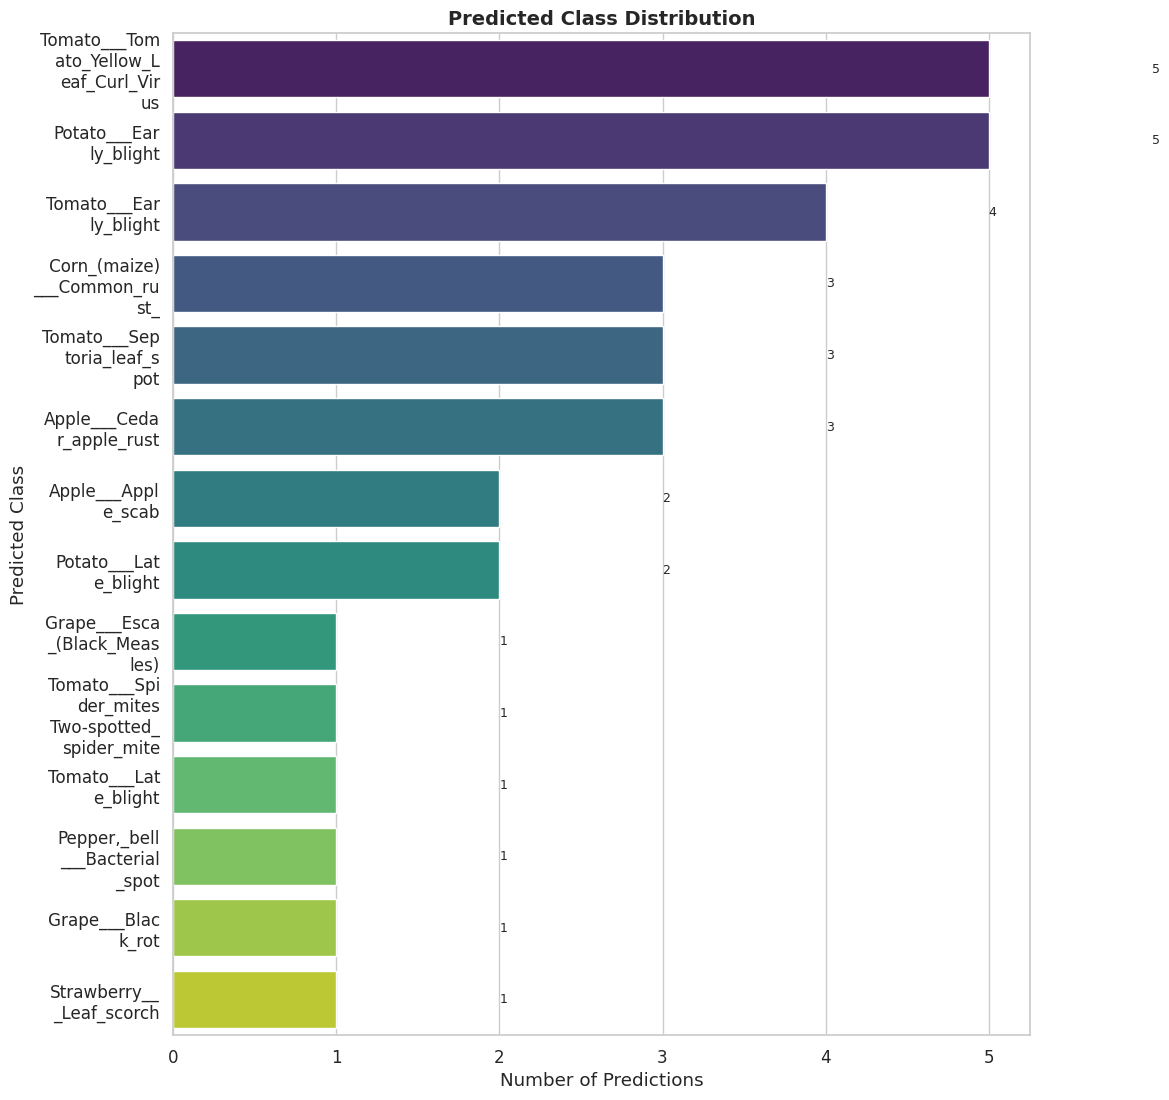

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


df = pd.read_csv("/content/drive/MyDrive/images/test_predictions.csv")

class_counts = df['Predicted_Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

class_counts['Class'] = class_counts['Class'].apply(lambda x: "\n".join(textwrap.wrap(x, 12)))

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, len(class_counts) * 0.8))
bars = sns.barplot(
    data=class_counts,
    y='Class',
    x='Count',
    palette='viridis'
)

for p in bars.patches:
    plt.text(p.get_width() + 1, p.get_y() + p.get_height()/2,
             int(p.get_width()), va='center', fontsize=9)

plt.title("Predicted Class Distribution", fontsize=14, weight='bold')
plt.xlabel("Number of Predictions")
plt.ylabel("Predicted Class")
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/images/Predicted Class Distribution.png", dpi=300, bbox_inches='tight')

plt.show()


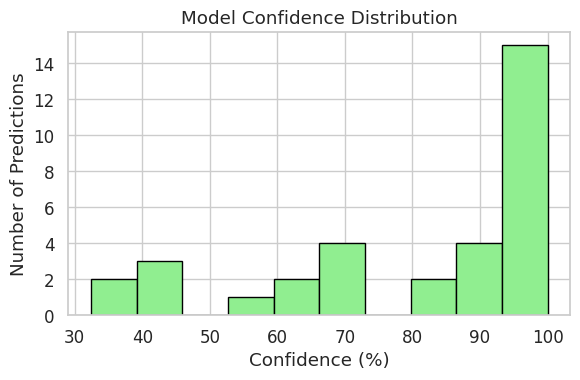

In [65]:
plt.figure(figsize=(6,4))
plt.hist(df['Confidence'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Model Confidence Distribution")
plt.xlabel("Confidence (%)")
plt.ylabel("Number of Predictions")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/images/confidence_distribution.png", dpi=300)
plt.show()
